# WeatherPy

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"
query_url = f"{url}appid={api_key}&units={units}&q="
#print(query_url)
response = requests.get(query_url + "London")
city_data = response.json()
city_data

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 7.61,
  'pressure': 1008,
  'humidity': 81,
  'temp_min': 6.67,
  'temp_max': 9},
 'visibility': 10000,
 'wind': {'speed': 2.6, 'deg': 300},
 'rain': {},
 'clouds': {'all': 75},
 'dt': 1573225122,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1573196741,
  'sunset': 1573230170},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [37]:
coord_lat = city_data['coord']['lat']
coord_lat

51.51

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
data = []
i = 0 
for city in cities:
    data_cities = requests.get(query_url + city).json()
    i = i + 1
    try:
        tempmax=data_cities["main"]['temp_max']
        humidity=data_cities["main"]["humidity"]
        speed=data_cities['wind']["speed"]
        cloudiness=data_cities["clouds"]["all"]
        lat=data_cities["coord"]["lat"]
        country=data_cities['sys']["country"]
        date=data_cities['dt']
        lon=data_cities["coord"]["lon"]
        data.append([city, cloudiness, country, date,humidity,lat, lon, tempmax, speed])
        print(f"counter {i} || {city}")
        time.sleep(.1)
        
    except:
        print ("city not found")

counter 1 || hithadhoo
counter 2 || ushuaia
counter 3 || barrow
counter 4 || yellowknife
counter 5 || mataura
counter 6 || albany
counter 7 || alice springs
counter 8 || burns lake
city not found
counter 10 || hobart
counter 11 || bredasdorp
counter 12 || hermanus
counter 13 || pingshan
counter 14 || porto novo
counter 15 || hilo
counter 16 || plettenberg bay
counter 17 || busselton
counter 18 || punta arenas
counter 19 || tuktoyaktuk
counter 20 || kirakira
city not found
counter 22 || guerrero negro
counter 23 || wonthaggi
counter 24 || buala
counter 25 || havoysund
city not found
city not found
counter 28 || bluff
counter 29 || sagaing
counter 30 || khatanga
city not found
counter 32 || esperance
counter 33 || luganville
counter 34 || sao filipe
counter 35 || kahului
counter 36 || shingu
counter 37 || anchorage
counter 38 || sur
counter 39 || coromandel
counter 40 || longyearbyen
counter 41 || talnakh
counter 42 || burnie
counter 43 || coihaique
counter 44 || cape town
counter 45 || 

counter 357 || galveston
counter 358 || sabana grande de boya
counter 359 || goroka
counter 360 || geraldton
counter 361 || tambun
city not found
counter 363 || baghdad
counter 364 || jingdezhen
counter 365 || paamiut
counter 366 || poum
counter 367 || belyye berega
city not found
counter 369 || bowen
counter 370 || severomorsk
counter 371 || kavaratti
counter 372 || gadsden
counter 373 || tuatapere
counter 374 || high level
counter 375 || verkh-usugli
counter 376 || huarmey
counter 377 || sao geraldo do araguaia
counter 378 || ribeira grande
counter 379 || brownwood
counter 380 || skjervoy
counter 381 || saldanha
counter 382 || torbay
counter 383 || los llanos de aridane
counter 384 || pascagoula
counter 385 || virtsu
counter 386 || hobyo
counter 387 || manga
counter 388 || senador jose porfirio
counter 389 || carballo
counter 390 || batagay
counter 391 || plastun
counter 392 || lagoa
counter 393 || soyo
counter 394 || yablonovo
counter 395 || kingseat
counter 396 || trzebiatow
counte

In [39]:
data_df=pd.DataFrame(data,columns=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hithadhoo,57,MV,1573225113,68,-0.60,73.08,28.36,2.71
1,ushuaia,75,AR,1573225374,93,-54.81,-68.31,4.00,11.30
2,barrow,100,AR,1573225374,26,-38.31,-60.23,20.44,4.65
3,yellowknife,75,CA,1573225374,84,62.45,-114.38,-13.33,2.10
4,mataura,100,NZ,1573225374,78,-46.19,168.86,13.33,1.59


In [40]:
data_df.to_csv(output_data_file)

In [41]:
data_df.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [42]:

date = time.strftime("%d/%m/%y")
date

'08/11/19'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<Figure size 432x288 with 0 Axes>

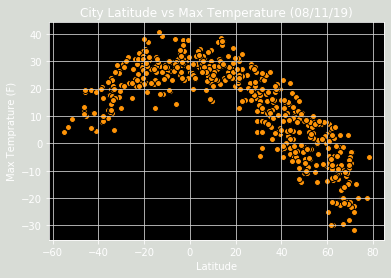

In [43]:
#plt.style.use("dark_background")
plt.figure(facecolor=(1, 1, 1))
fig = plt.figure()
fig.patch.set_facecolor("#d8dcd6")
plt.scatter(data_df["Lat"],data_df["Max Temp"], c="#ff9408", edgecolor="black" )
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")


#### Latitude vs. Humidity Plot

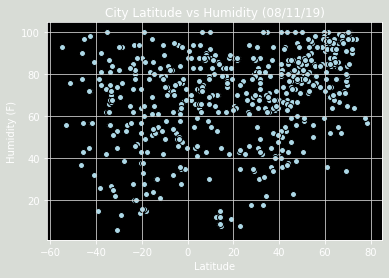

In [44]:
fig = plt.figure()
fig.patch.set_facecolor("#d8dcd6")
plt.scatter(data_df["Lat"],data_df["Humidity"], c="lightblue", edgecolor="black" )
plt.title(f"City Latitude vs Humidity ({date})")
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")

#### Latitude vs. Cloudiness Plot

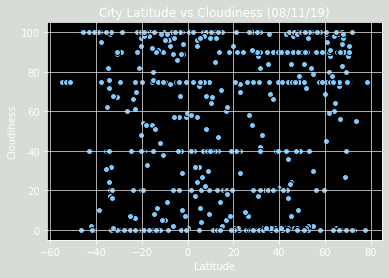

In [45]:
fig = plt.figure()
fig.patch.set_facecolor("#d8dcd6")
plt.scatter(data_df["Lat"],data_df["Cloudiness"], c="#82cafc", edgecolor="black")
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")


#### Latitude vs. Wind Speed Plot

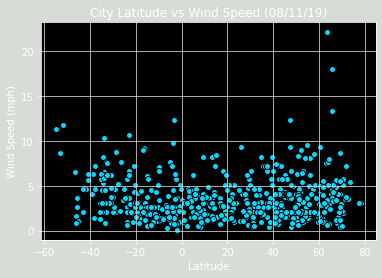

In [46]:
fig = plt.figure()
fig.patch.set_facecolor("#d8dcd6")
plt.scatter(data_df["Lat"],data_df["Wind Speed"], c="#04d9ff", edgecolor="black")
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")

Background

A geographic coordinate system (GCS) uses a three-dimensional spherical surface to define locations on the earth. A GCS is often incorrectly called a datum, but a datum is only one part of a GCS. A GCS includes an angular unit of measure, a prime meridian, and a datum (based on a spheroid).
A point is referenced by its longitude and latitude values. Longitude and latitude are angles measured from the earth's center to a point on the earth's surface. The angles often are measured in degrees (or in grads). 

The variations are the result of two phenomena: the orbit of the Earth around the sun and the tilt of the Earth's axis relative to the orbit.

The tilt is the primary reason that different latitudes experience different weather patterns or climates.

As latitude increases, the sun shines more obliquely and provides less warming energy. The equator always faces the sun directly, so the climate is warm year-round, with the average day and night temperature hovering between 12.5 and 14.3 degrees Celsius (54.5 and 57.7 degrees Fahrenheit).


Analysis

The weather trend for 08/11/2019 of 500+ cities across the world of varying distance from the equator shows:
-The temperature decreases as it approaches the zero degrees of latitude at the equator line.The southern hemisphere shows higher temperatures than the northern hemisphere as expected.
-The humidity levels for most of the cities are between 80 and 100 (F), no clear variance between humidity and latidutes.
-The cloudiness does not change greatly with a different latitudes. The most common cloudiness levels are 0 and 100%.
-The wind speed is spread evenly among hemispheres, wind speed tends to generally be betweeen 0 and 10 mph regardless of latitude

ref.https://sciencing.com/latitude-affect-climate-4586935.html
    http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm